In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio  
import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff  
from plotly.subplots import make_subplots  
from plotly.validators.scatter.marker import SymbolValidator

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_csv('../../29CM_PJT_data/real_jjin.csv')

In [4]:
df = df.drop(columns = 'Unnamed: 0')
df

,user_no,event_timestamp,event_name,item_no,device_type,mobile_brand_name,country,region,item_name,image_name,price,category1_name,category2_name,category3_name,brand_name,birth_date,gender
0,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 00:45:15.131034,click_item,LpYG/noVchHgoBnNcZVSIg==,mobile,Apple,South Korea,Seoul,[소이현 착용]Lily rounded skirts,778929fe4c9cb55cf31c10eeb32d511f,109000.0,의류,하의,스커트,Ouimaisnon,1994-03-02,F
1,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:25:21.016,click_item,FZVq83GdcPJgr3wrEHJhhw==,mobile,Apple,South Korea,Seoul,[ESSENTIAL] Leather-trimmed Canvas Shoulder Ba...,5acc87218ef184aa1427aaa05de1629b,258000.0,잡화,가방,숄더백,KINDERSALMON,1994-03-02,F
2,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:25:33.954012,click_item,h+dr/MasdQuHEsGeGEkLNA==,mobile,Apple,South Korea,Seoul,[ESSENTIAL] Mini Leather-trimmed Canvas Crossb...,4015d3c02f384e1d55cdace5a1cc099f,218000.0,잡화,가방,크로스백,KINDERSALMON,1994-03-02,F
3,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:27:09.349055,click_item,sFHqN8DrrD8kMKDmsaQHSQ==,mobile,Apple,South Korea,Seoul,SILKY SHIRTS - IVORY,c966009d15de27ae499c32d72b7b4afc,109000.0,의류,상의,셔츠/블라우스,MORE OR LESS,1994-03-02,F
4,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:27:43.951067,click_item,78y9c+k2Nn/+oaP0NR/UFA==,mobile,Apple,South Korea,Seoul,AIR BLOUSE - BROWN,d3b856c2a793a8396c8f65b65cd863a4,112000.0,의류,상의,셔츠/블라우스,MORE OR LESS,1994-03-02,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531576,a+VESOxVicnmoRFK/nDSNg==,2021-07-23 10:24:43.755015,click_item,1piCtiz5rGBfQFO3Sm1mIw==,mobile,Apple,South Korea,Gangwon-do,[장미맨숀] 모듈러 월시스템 벽선반 1750 ( NO.1-1 ),7298da347d113e2d6bab51a027f684f0,498000.0,가구/인테리어,수납가구,선반,장미맨숀,1982-11-14,F
2531577,a+VESOxVicnmoRFK/nDSNg==,2021-07-23 11:08:12.004037,click_item,hi15X0cp/d1ViDT1DrTVxQ==,mobile,Apple,South Korea,Gangwon-do,caddy bag (3color),86b585d7d61ada557d1ae5de70383958,84000.0,잡화,가방,크로스백,mazi untitled,1982-11-14,F
2531578,a+VESOxVicnmoRFK/nDSNg==,2021-07-23 18:31:13.695034,click_item,amWa/aHVwUCm2GsVGhXprw==,mobile,Apple,South Korea,Seoul,21FW ABACELL MINI BAG - BROWN,4aa90f60369a052e2e9353d7c15cda18,158000.0,잡화,가방,크로스백,LOWCLASSIC,1982-11-14,F
2531579,a+VESOxVicnmoRFK/nDSNg==,2021-07-29 18:04:24.330176,click_item,O408esdGDd8UvBwWmq9Qsg==,mobile,Apple,South Korea,Gangwon-do,[STANLEY] 스탠리 어드벤처 진공 와이드-베이스 머그 591ml,6c5909659b6cdad282b0647e8aea9b84,46000.0,스포츠/레저,캠핑,기타 캠핑용품,STANLEY,1982-11-14,F


### 구매를 기준으로 생각할 수 있는 사항들
1. 구매 물품의 카테고리는?
2. 구매자들의 지역은?
3. 구매자들의 연령대는?
4. 구매 물품의 가격대는?
5. 구매자들의 성별은?
6. 구매가 이루어진 환경은?

7. 위 항목들의 관계는?
8. 클릭부터 구매까지 이루어진 제품들의 특징은? (월별, 지역별)

In [5]:
# 생일이 비어있는 경우 1989-01-01로 처리 (34살이 평균 나이)
# 반응 타임스탬프와 생일정보 datetime으로 변경

df['event_timestamp'] = pd.to_datetime(df.event_timestamp, format = '%Y-%m-%d %H:%M:%S')
df['birth_date'] = pd.to_datetime(df.birth_date, format = '%Y-%m-%d', errors='coerce')
df['birth_date'] = df['birth_date'].fillna('1989-01-01')
df['birth_date'] = pd.to_datetime(df.birth_date, format = '%Y-%m-%d', errors='coerce')
df['gender'] = df['gender'].fillna('O')

In [6]:
df['age'] = 2023 - df.birth_date.dt.year

In [7]:
# 국가와 지역을 입력하지 않은 사람 11
# 지역만 입력하지 않은 사람 1143

(~(df.country.isnull())&(df.region.isnull())).sum()

1143

In [8]:
# 지역만 입력하지 않은 사람들의 나라

df.loc[(~(df.country.isnull())&(df.region.isnull())), 'country'].unique()

array(['Singapore', 'Japan', 'United States', 'Guyana', 'South Korea',
       'Hong Kong', 'China', 'British Virgin Islands', 'United Kingdom'],
      dtype=object)

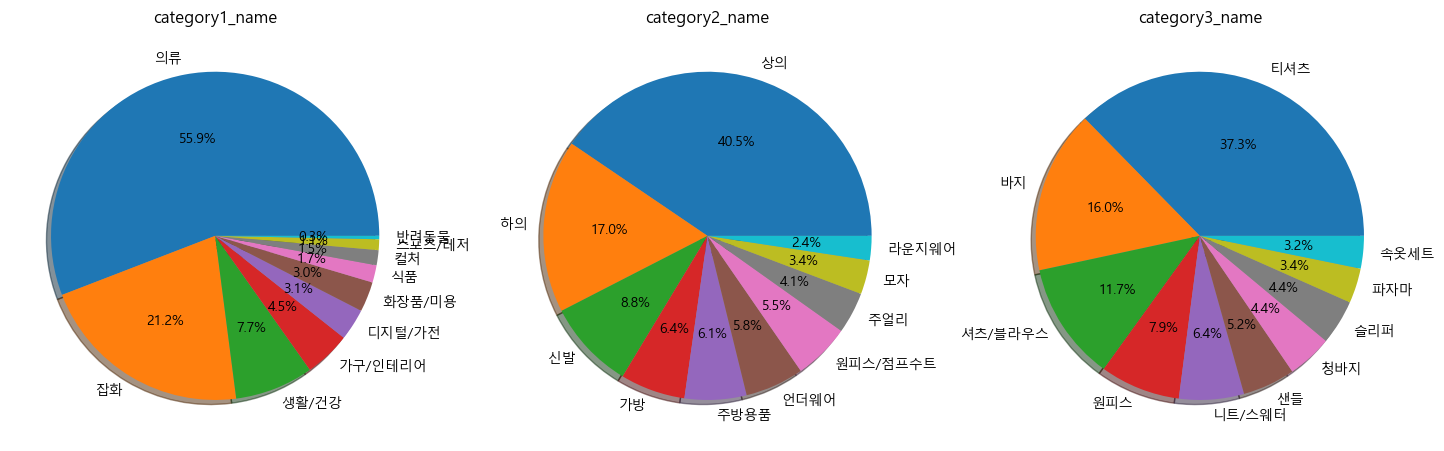

In [9]:
# 구매 품목들의 카테고리 분포

f, ax = plt.subplots(1, 3, figsize = (18, 8))
df.loc[(df.event_name == 'purchase_success'), 'category1_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[0], shadow=True);
ax[0].set_title('category1_name')
ax[0].set_ylabel('')

df.loc[(df.event_name == 'purchase_success'), 'category2_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[1], shadow=True);
ax[1].set_title('category2_name')
ax[1].set_ylabel('')

df.loc[(df.event_name == 'purchase_success'), 'category3_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[2], shadow=True);
ax[2].set_title('category3_name')
ax[2].set_ylabel('')

plt.show()

In [10]:
# 구매자들의 대부분은 한국 유저

df.loc[df['event_name']=='purchase_success', 'country'].value_counts()

South Korea             207575
Taiwan                     164
Japan                      129
Hong Kong                   33
Vietnam                     27
Singapore                   23
United States               20
United Arab Emirates        13
Australia                   13
Canada                      12
China                       11
Malaysia                    10
Indonesia                    6
Thailand                     6
Italy                        5
Qatar                        4
Finland                      3
United Kingdom               1
Lebanon                      1
Name: country, dtype: int64

In [11]:
mapper = {'Gyeonggi-do': '경기도',
         'Seoul': '서울특별시', 
         'Gyeongsangbuk-do': '경상북도', 
         'Busan': '부산광역시', 
         'Ulsan': '울산광역시', 
         'Gyeongsangnam-do': '경상남도', 
         'Chungcheongbuk-do': '충청북도', 
         'Gwangju':'광주광역시', 
         'Chungcheongnam-do': '충청남도',
         'Jeju-do': '제주특별자치도',
         'Jeollanam-do': '전라남도',
         'Daejeon': '대전광역시',
        'Jeollabuk-do': '전라북도',
        'Daegu': '대구광역시',
        'Gangwon-do': '강원도',
        'Incheon': '인천광역시'}

df.loc[df['country']=='South Korea', 'region'] = df.loc[df['country']=='South Korea', 'region'].map(mapper)

In [12]:
df_group = df.loc[df['event_name']=='purchase_success'].groupby('user_no').agg({'price' : 'sum', 'age' : 'mean', 'region' : lambda x : x})
df_group

,price,age,region
user_no,,,
++C4Jco6ku9bc5GwwNuByQ==,436600.0,49.0,"[인천광역시, 인천광역시, 인천광역시, 인천광역시, 인천광역시, 인천광역시, 인천광..."
++FBFfYZThncncIvHjLbKQ==,1078500.0,37.0,"[서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특..."
++GVOXP4cXADbykjQID0Xw==,898800.0,21.0,"[대구광역시, 대구광역시, 대구광역시, 대구광역시, 대구광역시, 대구광역시, 대구광..."
++KVqHvNPHvp3LL9SkuL8A==,225800.0,19.0,"[강원도, 강원도, 강원도, 강원도, 강원도]"
++KjBls4euaEX77FWJaZ/A==,4981600.0,29.0,"[서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특..."
...,...,...,...
zzFwuJbZhoxI4GAvblPbdw==,414950.0,34.0,"[경기도, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시..."
zzLGF7vXyODnAkQWIcqX0g==,639000.0,27.0,"[경기도, 경기도, 경기도, 경기도, 경기도, 경기도]"
zzQb08qbNg8VZ+c3wMVhuw==,413700.0,51.0,"[서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특..."


In [13]:
# 지역 정보 없는 유저 3명 - 서울특별시로 바꿈
df_group.region = df_group.region.fillna('서울특별시')

In [21]:

for row in df_group.iterrows():
    if type(row[1]['region']) is np.ndarray :
        df_group['region'][row[0]] = max(row[1]['region'])
        

TypeError: '>' not supported between instances of 'str' and 'float'